In [446]:
#importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [447]:
#leer bases de datos
cronicos = pd.read_csv('databases/RETO_df_cronicos.csv',low_memory=False)
egresos= pd.read_csv('databases/RETO_df_egresos.csv')   
usuarios = pd.read_csv('databases/RETO_df_usuarios.csv',low_memory=False)

## Analisisi Exploratorio 

In [448]:
#mostrar cronicos
cronicos.head(1)

,YEAR,MES,Fecha diligenciamiento,Hora,Atención,Ingreso,Tipo,NRODOC,Peso,Talla,...,Diagnostico79,NombreDiagnostico79,Diagnostico80,NombreDiagnostico80,Diagnostico81,NombreDiagnostico81,Diagnostico82,NombreDiagnostico82,Diagnostico83,NombreDiagnostico83
0,2017,OCTUBRE,2017-10-02,9:00:20 a. m.,3912499,2629714,CC,311144,69.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
#mostrar egresos
egresos.head(1)

,YEAR,MES,NRO ATENCION,NRO INGRESO,SERVICIO HABILITADO COD,SERVICIO HABILITADO,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN AFILIACION,...,DX PRINCIPAL EGRESO CAPITULO COD,DX PRINCIPAL EGRESO CAPITULO,CAUSA BASICA MUERTE COD,CAUSA BASICA MUERTE,CAUSA BASICA CATEGORIA COD,CAUSA BASICA CATEGORIA,CAUSA BASICA CAPITULO COD,CAUSA BASICA CAPITULO,PROFESIONAL ESPECIALIDAD,PROFESIONAL ESPECIALIDAD GRD
0,2017,MAYO,3433964,1899917,-1.0,Sin Informacion,CC,308185,1937-07-18 00:00:00.000,Sin información,...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna


In [450]:
#mostrar usuarios
usuarios.head(1)

,MES,YEAR,NRODOC,SEXO,FECHA NACIMIENTO,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,FECHA PRIMERA CLASE FUNCIONAL,PRIMERA CLASE FUNCIONAL,FECHA ÚLTIMA CLASE FUNCIONAL,ÚLTIMA CLASE FUNCIONAL,CICLO_VITAL,QUINQUENIO
0,ABRIL,2017,306221,F,1938-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtro inicial 

In [451]:
#se crea una tabla nueva con los usuarios que tienen un ciclo vital en vejez
vejez = usuarios[usuarios["CICLO_VITAL"] == "Vejez"]
vejez.shape
#unir las 3 bases de datos
df1 = pd.merge(vejez, egresos, on='NRODOC', how='inner').merge(cronicos, on='NRODOC', how='inner')
#crear tabla nueva con la base de datos egresos con MODALIDAD CONTRATO = PGP
df1= df1[df1["MODALIDAD CONTRATO"] == "PGP"]
df1.shape

(549854, 370)

In [452]:
#se cambia formato "2017-04-30 00:00:00"  fecha FECHA INICIO AL PGP 
df1["FECHA INICIO AL PGP"] = pd.to_datetime(df1["FECHA INICIO AL PGP"], format='%Y-%m-%d %H:%M:%S')

count    1830.000000
mean      300.466667
std       337.099531
min         2.000000
25%        72.000000
50%       224.000000
75%       384.000000
max      3744.000000
Name: count, dtype: float64
NRODOC
308373    3744
307942    3360
307148    3136
309697    2592
306404    2304
          ... 
311672       3
313763       2
313282       2
312437       2
309859       2
Name: count, Length: 1830, dtype: int64


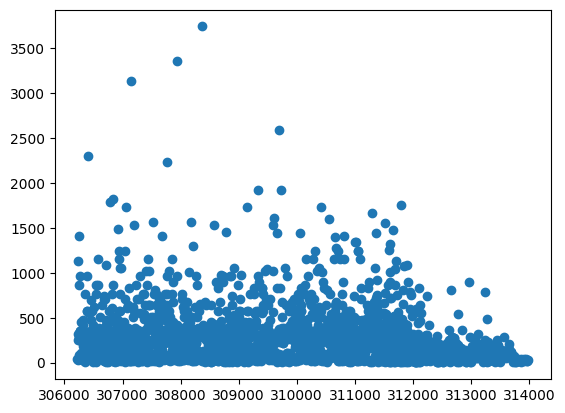

In [453]:

# muestrame los descripctivos de la columna NRODOC
print(df1["NRODOC"].value_counts().describe())
print(df1["NRODOC"].value_counts())
# graficar en un diagrama de dispersion los NRODOC.value_counts()
plt.scatter(df1["NRODOC"].value_counts().index, df1["NRODOC"].value_counts())
plt.show()



In [454]:
# en la variable NRODOC = 309697, muestrame los datos de cada columna observar una fila
df1[df1["NRODOC"] == 309697].head(1)



,MES_x,YEAR_x,NRODOC,SEXO,FECHA NACIMIENTO_x,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,...,Diagnostico79,NombreDiagnostico79,Diagnostico80,NombreDiagnostico80,Diagnostico81,NombreDiagnostico81,Diagnostico82,NombreDiagnostico82,Diagnostico83,NombreDiagnostico83
30679,SEPTIEMBRE,2017,309697,F,NaN,82.0,NaN,NaN,ROBLEDO KENNEDY,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [455]:
df1['FECHA INGRESO CLINICA'] = pd.to_datetime(df1['FECHA INGRESO CLINICA'])
df1['FECHA SALIDA'] = pd.to_datetime(df1['FECHA SALIDA'])

# Calcula la diferencia y crea una nueva columna para almacenarla
df1['TIEMPO DE ESTANCIA'] = df1['FECHA SALIDA'] - df1['FECHA INGRESO CLINICA']
#muestra la base de datos objetivo  con la nueva columna
df1.head(1) 

,MES_x,YEAR_x,NRODOC,SEXO,FECHA NACIMIENTO_x,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,...,NombreDiagnostico79,Diagnostico80,NombreDiagnostico80,Diagnostico81,NombreDiagnostico81,Diagnostico82,NombreDiagnostico82,Diagnostico83,NombreDiagnostico83,TIEMPO DE ESTANCIA
0,SEPTIEMBRE,2017,310364,M,NaN,66.0,NaN,NaN,MEDELLIN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 days 22:49:34.080000


In [456]:
# se observa la cantidad de cada valor unico de la columna 'YEAR'
df1['YEAR'].value_counts() # se decide limitar el analisis al año 2021 y 2022 ya que son los años con mayor cantidad de datos, ademas de ser los años mas actualizados

YEAR
2021    245476
2018    154209
2022    112929
2017     37240
Name: count, dtype: int64

In [457]:
# eliminar de la base de datos df1 los valores de la columna 'YEAR' 2017 y 2018    
df1=df1[df1["YEAR"] != 2017]
df1=df1[df1["YEAR"] != 2018]

In [458]:
# muestra un listado de las 10 que mas se repitan en la columna "DX PRINCIPAL EGRESO CAPITULO" de la base de datos df1 
df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts().head(10)

DX PRINCIPAL EGRESO CAPITULO
ENFERMEDADES DEL SISTEMA RESPIRATORIO                                             80804
ENFERMEDADES DEL SISTEMA CIRCULATORIO                                             58506
ENFERMEDADES DEL SISTEMA DIGESTIVO                                                44178
ENFERMEDADES DEL SISTEMA GENITOURINARIO                                           40311
TRAUMATISMOS, ENVENENAMIENTO Y ALGUNAS OTRAS CONSECUENCIAS DE CAUSAS EXTERNAS     32499
ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METABOLICAS                              30482
ENFERMEDADES DEL SISTEMA NERVIOSO                                                 18354
CODIGOS PARA PROPOSITOS ESPECIALES                                                15056
CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS                                    7433
TUMORES [NEOPLASIAS]                                                               7329
Name: count, dtype: int64

In [459]:
 # SE OBSERVA QUE CON  LAS PERIMERAS 8 VARIABLES SE TIENE EL 89.33% APROXIMADAMENTE DE LA INFORMACION DE LA BASE DE DATOS DF1 RELACIONADA CON LA COLUMNA "DX PRINCIPAL EGRESO CAPITULO"   
df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts().head(8).sum()/df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts().sum()*100  


89.33748134094111

In [460]:
#Se eliminan las filas de las columnas "DX PRINCIPAL EGRESO CAPITULO" que no esten en las 8 primeras variables
df1=df1[df1["DX PRINCIPAL EGRESO CAPITULO"].isin(df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts().head(8).index)]

In [461]:
 # mostrar QUE ENFERMEDADES DEL SISTEMA RESPIRATORIO representan el 25.23% de los egresos de la base de datos df1 
df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts(normalize=True).head(10)

DX PRINCIPAL EGRESO CAPITULO
ENFERMEDADES DEL SISTEMA RESPIRATORIO                                             0.252363
ENFERMEDADES DEL SISTEMA CIRCULATORIO                                             0.182723
ENFERMEDADES DEL SISTEMA DIGESTIVO                                                0.137974
ENFERMEDADES DEL SISTEMA GENITOURINARIO                                           0.125897
TRAUMATISMOS, ENVENENAMIENTO Y ALGUNAS OTRAS CONSECUENCIAS DE CAUSAS EXTERNAS     0.101499
ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METABOLICAS                              0.095200
ENFERMEDADES DEL SISTEMA NERVIOSO                                                 0.057322
CODIGOS PARA PROPOSITOS ESPECIALES                                                0.047022
Name: proportion, dtype: float64

In [462]:
#Se eliminan las filas de las columnas "DX PRINCIPAL EGRESO CAPITULO" que no esten en la primera variable
df3=df1[df1["DX PRINCIPAL EGRESO CAPITULO"].isin(df1["DX PRINCIPAL EGRESO CAPITULO"].value_counts().head(1).index)]


In [463]:
# Se observa la nuludad de las columnas mayores a 0 en la base de datos df3 en porcentaje 
nulos=df3.isnull().sum()/len(df3)*100
# Se ven los nulos vayores a 80 de la base nulos
nulos[nulos>80]
# y eliminarlos de la base de datos df3
df3=df3.drop(columns=nulos[nulos>80].index)

In [464]:
#ver la base de datos df3
df3.head(1)

,MES_x,YEAR_x,NRODOC,SEXO,FECHA NACIMIENTO_x,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,...,Ambito según el médico,Diagnostico1,NombreDiagnostico1,Diagnostico2,NombreDiagnostico2,Diagnostico3,NombreDiagnostico3,Diagnostico4,NombreDiagnostico4,TIEMPO DE ESTANCIA
5,SEPTIEMBRE,2017,310364,M,NaN,66.0,NaN,NaN,MEDELLIN,NaT,...,Ambulatorio,I10X,HIPERTENSION ESENCIAL (PRIMARIA),E780,HIPERCOLESTEROLEMIA PURA,E669,OBESIDAD NO ESPECIFICADA,NaN,NaN,6 days 22:49:34.080000


In [465]:
# crear una base de datos nueva llamada df2 con las siguientes columnas NRODOC,SEXO, EDAD, DEPARTAMENTO,	MUNICIPIO,	BARRIO, ÚLTIMA CLASE FUNCIONAL, SERVICIO HABILITADO, TIPO IDENTIFICACION, REGIMEN AFILIACION,  EPS VALIDADA, SERVICIO ADMITE, BLOQUE ANTERIOR,	PISO ANTERIOR,	SERVICIO ANTERIOR,	NRO CAMA ANTERIOR, VIA INGRESO, BLOQUE,	UNIDAD ESTRATEGICA,	PISO,	NRO CAMA,	SERVICIO EGRESO,	TIPO EGRESO,	FECHA INGRESO CLINICA, FECHA SALIDA,TRANSFUSION SANGRE,	ANTIBIOTICO, DX PRINCIPAL EGRESO CAPITULO, PROFESIONAL ESPECIALIDAD GRD, Peso	,Talla	,IMC	,Clasificación IMC	,Saturación de Oxígeno (%)	,Perímetro Muslo	,Perímetro Cintura	,Pliegue Triceps	,Pliegue Abdomen	, Pliegue Muslo,	Sumatoria Pliegues , Presión Arterial Sistólica,	Presión Arterial Diastólica	, Frecuencia Cardíaca en reposo	, Auto-calificacion Nivel de Ejercicio	, Constantes	, METS -Índice Metabólico	, VO2 - Máxima Cantidad de Oxígeno	, Índice de Fragilidad Groningen	,Calificación (Índice de Fragilidad)	,Tiempo en Segundos (Apoyo Monopodal) , Calificación (Apoyo Monopodal)	, Tiempo en Segundos (Recorrer 5 metros)	, Velocidad (m/s)	, Calificación Velocidad	, Test Findrisc	, Índice Tobillo/Brazo	, Presión arterial registro medico	, Diabetes Mellitus	, Tipo diabetes mellitus	, Tiempo con el diagnóstico	, Glicemia	, Fecha glicemia	, Hemoglobina Glicada	, Fecha hemoglobina glicosilada	, Control Diabetes	, Tiene HTA	, Control HTA	, Tiene riesgo de tener HTA	, Tiempo con el diagnóstico1	, Tiene EPOC	, EPOC (Clasificación BODEX)	, Enfermedad Coronaria (En el último año)	, Insuficiencia Cardíaca	, Valvulopatía	, Arritmia o paciente con dispositivo	, Sufre de alguna enfermedad cardiovascular	, ¿Cuál?	, Tabaquismo	, Cuantos cigarrillos día	, Años de Consumo	, Lipoproteina	, Fecha LDL	, HDL	, Fecha HDL	, Colesterol total	, Fecha colesterol total	, Trigliceridos	, Fecha trigliceridos	, Clasificación de Framinghan	, Creatinina 1 consulta	, Fecha creatinina1	, Tasa de Filtración Glomerular TFG	, Estadio de la Enfermedad Renal	, Microalbuminuria	, Fecha microalbuminuria	, Hormona Estimulante de la Tiroides (TSH)	, Clase Funcional	, Creatinina 2 consulta	, Fecha creatinina2	, Tasa de Filtración Glomerular TFG2	, Meses de diferencia entre TFG	, Cambio de TFG	, Clasificación Cambio de TFG	Basciloscopia	, Úlcera de pie diabético	Remisión	, Diagnóstico Principal	, Análisis y conducta a seguir	 , Tiene próximo control	, Fecha Próximo Control	  , Tipo control	, Requiere cita de morbilidad	Fecha cita morbilidad	, Ambito según el médico	, Diagnostico1, 	NombreDiagnostico1	, Diagnostico2	 , NombreDiagnostico2	, Diagnostico3	, NombreDiagnostico3	, TIEMPO DE ESTANCIA , de la base de datos df1
df2=df3[["NRODOC","SEXO","EDAD","DEPARTAMENTO","MUNICIPIO","BARRIO",
         "ÚLTIMA CLASE FUNCIONAL","SERVICIO HABILITADO","TIPO IDENTIFICACION",
         "REGIMEN AFILIACION","EPS VALIDADA","SERVICIO ADMITE","BLOQUE ANTERIOR",
         "PISO ANTERIOR","SERVICIO ANTERIOR","NRO CAMA ANTERIOR","VIA INGRESO","BLOQUE",
         "UNIDAD ESTRATEGICA","PISO","NRO CAMA","SERVICIO EGRESO","TIPO EGRESO",
         "FECHA INGRESO CLINICA","FECHA SALIDA","TRANSFUSION SANGRE","ANTIBIOTICO",
         "DX PRINCIPAL EGRESO CAPITULO","PROFESIONAL ESPECIALIDAD GRD","Peso","Talla","IMC",
         "Clasificación IMC","Saturación de Oxígeno (%)","Perímetro Muslo","Perímetro Cintura",
         "Pliegue Triceps","Pliegue Abdomen","Pliegue Muslo","Sumatoria Pliegues",
         "Presión Arterial Sistólica","Presión Arterial Diastólica",
         "Frecuencia Cardíaca en reposo","Auto-calificacion Nivel de Ejercicio",
         "Constantes","METS -Índice Metabólico","VO2 - Máxima Cantidad de Oxígeno",
         "Índice de Fragilidad Groningen","Calificación (Índice de Fragilidad)",
         "Tiempo en Segundos (Apoyo Monopodal)","Calificación (Apoyo Monopodal)",
         "Tiempo en Segundos (Recorrer 5 metros)","Velocidad (m/s)","Calificación Velocidad",
         "Test Findrisc","Índice Tobillo/Brazo","Presión arterial registro medico","Diabetes Mellitus",
         "Tipo diabetes mellitus","Tiempo con el diagnóstico","Glicemia","Fecha glicemia",
         "Hemoglobina Glicada","Fecha hemoglobina glicosilada","Control Diabetes",
         "Tiene HTA","Control HTA","Tiene riesgo de tener HTA","Tiempo con el diagnóstico1",
         "Tiene EPOC","EPOC (Clasificación BODEX)","Enfermedad Coronaria (En el último año)",
           "Insuficiencia Cardíaca","Valvulopatía","Arritmia o paciente con dispositivo",
           "Sufre de alguna enfermedad cardiovascular","¿Cuál?","Tabaquismo",
           "Cuantos cigarrillos día","Años de Consumo","Lipoproteina","Fecha LDL",
           "HDL","Fecha HDL","Colesterol total","Fecha colesterol total","Trigliceridos",
           "Fecha trigliceridos","Clasificación de Framinghan","Creatinina 1 consulta",
           "Fecha creatinina1","Tasa de Filtración Glomerular TFG","Estadio de la Enfermedad Renal",
           "Microalbuminuria","Fecha microalbuminuria","Hormona Estimulante de la Tiroides (TSH)",
           "Clase Funcional","Creatinina 2 consulta","Fecha creatinina2",
           "Tasa de Filtración Glomerular TFG2","Meses de diferencia entre TFG","Cambio de TFG",
           "Clasificación Cambio de TFG","Basciloscopia","Úlcera de pie diabético","Remisión",
           "Diagnóstico Principal","Análisis y conducta a seguir","Tiene próximo control",
           "Fecha Próximo Control","Tipo control","Requiere cita de morbilidad","Fecha cita morbilidad",
           "Ambito según el médico","Diagnostico1","NombreDiagnostico1","Diagnostico2","NombreDiagnostico2",
           "Diagnostico3","NombreDiagnostico3", 'QUINQUENIO',"TIEMPO DE ESTANCIA"]]
#ver la base de datos df2
df2.head(1)                                                                                 

,NRODOC,SEXO,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,ÚLTIMA CLASE FUNCIONAL,SERVICIO HABILITADO,TIPO IDENTIFICACION,REGIMEN AFILIACION,...,Fecha cita morbilidad,Ambito según el médico,Diagnostico1,NombreDiagnostico1,Diagnostico2,NombreDiagnostico2,Diagnostico3,NombreDiagnostico3,QUINQUENIO,TIEMPO DE ESTANCIA
5,310364,M,66.0,NaN,NaN,MEDELLIN,NaN,General adultos,CC,Contributivo,...,NaN,Ambulatorio,I10X,HIPERTENSION ESENCIAL (PRIMARIA),E780,HIPERCOLESTEROLEMIA PURA,E669,OBESIDAD NO ESPECIFICADA,65-69,6 days 22:49:34.080000


In [466]:
#Se ven las dimensiones de la base de datos df2
df2.shape

(80804, 122)

In [467]:
#Se muestran las 15 columnas con mayor datos nulos de la base de datos df2 en porcentaje
nulos=df2.isnull().sum()/len(df2)*100
nulos.sort_values(ascending=False).head(15)

Clasificación Cambio de TFG         75.295777
NombreDiagnostico3                  62.650364
Diagnostico3                        62.650364
Fecha cita morbilidad               62.055096
Fecha LDL                           55.914311
Diagnostico2                        55.492302
NombreDiagnostico2                  55.492302
Tiempo con el diagnóstico           52.118707
Test Findrisc                       51.928122
EPOC (Clasificación BODEX)          51.431860
¿Cuál?                              50.686847
Tipo diabetes mellitus              49.070591
Presión arterial registro medico    45.812089
MUNICIPIO                           42.542448
DEPARTAMENTO                        42.539973
dtype: float64

In [468]:
#Se eliminar las columnas que se consideran no relevantes para el analisis, debido a su cantidad de datos nulos o a la cantidad de datos repetidos
df2=df2.drop(columns=["Fecha creatinina1", "Diagnóstico Principal","Diagnostico1","Fecha creatinina2",
                      "Tiempo con el diagnóstico1","Fecha microalbuminuria", "Fecha hemoglobina glicosilada",
                      "Tipo control","Fecha Próximo Control","Fecha trigliceridos",'Auto-calificacion Nivel de Ejercicio',
                      'Constantes','Años de Consumo', 'Microalbuminuria', 'Hormona Estimulante de la Tiroides (TSH)',
                      'Meses de diferencia entre TFG','Cambio de TFG',"Fecha colesterol total",
                      'Tiempo en Segundos (Apoyo Monopodal)',"Fecha HDL","Fecha glicemia",
                      "Presión arterial registro medico","NombreDiagnostico1","Diagnostico2",
                      "NombreDiagnostico2","Fecha LDL","¿Cuál?","Fecha cita morbilidad","NombreDiagnostico3",
                      "Diagnostico3","Tiempo con el diagnóstico","Diagnostico2","NombreDiagnostico2","Fecha LDL",
                      "¿Cuál?","DEPARTAMENTO","MUNICIPIO","BARRIO","TIPO IDENTIFICACION",'Análisis y conducta a seguir',
                      'Basciloscopia',  'Úlcera de pie diabético',"REGIMEN AFILIACION","EPS VALIDADA",
                      "DX PRINCIPAL EGRESO CAPITULO","SERVICIO ADMITE" ,"PISO ANTERIOR",'Tiene riesgo de tener HTA',
                      'SERVICIO ANTERIOR','NRO CAMA ANTERIOR', 'PISO',"NRO CAMA",'SERVICIO EGRESO','TRANSFUSION SANGRE',
                      "Enfermedad Coronaria (En el último año)",'Insuficiencia Cardíaca','Valvulopatía',
                      'Arritmia o paciente con dispositivo','Cuantos cigarrillos día','Lipoproteina',
                      'Clasificación Cambio de TFG']) 


In [473]:
# Se modifican los nulos de las siguientes columnas de acuerdo a sus requerimientos previamente analisasdos, de modo que no se creen sesgos base de datos df2
df2["BLOQUE ANTERIOR"]=df2["BLOQUE ANTERIOR"].fillna(0) #posiblemeente se trata de unpasiente que no a ingresado antes
df2["Índice Tobillo/Brazo"]=df2["Índice Tobillo/Brazo"].fillna(0)  #posiblemeente se trata de unpasiente que no a ingresado antes
df2["Test Findrisc"]=df2["Test Findrisc"].fillna("No aplica") # posiblemnete la nulidad se debe a que no se le realizo la clasificacion
df2["EPOC (Clasificación BODEX)"]=df2["EPOC (Clasificación BODEX)"].fillna("No aplica") # posiblemnete la nulidad se debe a que no se le realizo la clasificacion
df2["Tipo diabetes mellitus"]=df2["Tipo diabetes mellitus"].fillna("No aplica") # posiblemnete la nulidad se debe a que no se le realizo la clasificacion
df2["ÚLTIMA CLASE FUNCIONAL"]=df2["ÚLTIMA CLASE FUNCIONAL"].fillna("Sin Dato") # se decide reemplazar la nulidad por sin dato
df2["ÚLTIMA CLASE FUNCIONAL"]=df2["ÚLTIMA CLASE FUNCIONAL"].replace(["Sin Clasificar","SIN CLASIFICAR"],"Sin Dato") # se decide reemplazar la Sin Clasificar, SIN CLASIFICAR por sin dato
df2["Estadio de la Enfermedad Renal"]=df2["Estadio de la Enfermedad Renal"].fillna("Estadio 0") # se decide reemplazar la nulidad por Estadio 0 ya que no requiere tratamiento
df2["Tiene próximo control"]=df2["Tiene próximo control"].fillna("No") # se decide reemplazar la nulidad por No ya que se asume que no tiene proximo control
df2["HDL"]=df2["HDL"].fillna(40) # se decide reemplazar la nulidad por el valor 40 el cual representa epara las personas mayores de 20 años un nivel aceptable
df2["Trigliceridos"]=df2["Trigliceridos"].fillna(121.4) # se reemplaza la nulidad por 121.4 la cual es la mediana de los datos 
df2["Tiene EPOC"]=df2["Tiene EPOC"].fillna("No") # se reemplaza la nulidad por No ya que posiblemnete no aplica 
df2["Tiene HTA"]=df2["Tiene HTA"].fillna("No") # se reemplaza la nulidad por No ya que posiblemnete no aplica 
df2["Control Diabetes"]=df2["Control Diabetes"].fillna("No aplica") # se reemplaza la nulidad por No aplica ya que posiblemnete no aplica 
df2["Control HTA"]=df2["Control HTA"].fillna("No aplica") # se reemplaza la nulidad por No ya que posiblemnete no aplica 
df2["Colesterol total"]=df2["Colesterol total"].fillna(133.1) # se reemplaza la nulidad por 29.55 la cual es la mediana de los datos 
df2["Creatinina 1 consulta"]=df2["Creatinina 1 consulta"].fillna(0.88) # se reemplaza la nulidad por 0.88 la cual es la mediana de los datos 
df2["Diabetes Mellitus"]=df2["Diabetes Mellitus"].fillna(29.55) # se reemplaza la nulidad por 29.55 la cual es la mediana de los datos 
df2["Tabaquismo"]=df2["Tabaquismo"].fillna("No") # se reemplaza la nulidad por No ya que posiblemnete no aplica 
df2["Sufre de alguna enfermedad cardiovascular"]=df2["Sufre de alguna enfermedad cardiovascular"].fillna("No") # se reemplaza la nulidad por No ya que posiblemnete no aplica 
df2["Creatinina 1 consulta"]=df2["Creatinina 1 consulta"].apply(lambda x: 4 if x>4 else x) # se reemplazan los valores mayores a 4 ya que luego de esta valor ya es una falla en los riñones
df2["Presión Arterial Sistólica"]=df2["Presión Arterial Sistólica"].apply(lambda x: 131 if x>131 else x) # se reemplazan los valores mayores a 131 ya que luego de esta valor ya es una hipertension
df2["Presión Arterial Sistólica"]=df2["Presión Arterial Sistólica"].apply(lambda x: 81 if x<81 else x)# se reemplazan los valores menores a 81 ya que luego de esta valor ya es una hipotension
df2["Saturación de Oxígeno (%)"]=df2["Saturación de Oxígeno (%)"].apply(lambda x: 86 if x<86 else x) # se reemplazan los valores menores a 86 yaque luego de ese valor se considera hipoxia severa
df2["Glicemia"]=df2["Glicemia"].apply(lambda x: 201 if x>200 else x) # se reemplazan los valores mayores a 200 ya que luego de esta valor ya es una hiperglicemia
df2["ÚLTIMA CLASE FUNCIONAL"]=df2["ÚLTIMA CLASE FUNCIONAL"].replace(["Clase funcional 4","Clase funcional 2A","Clase funcional 2B","Clase funcional 3","Clase funcional 1","Sin clasificar"],["CLASE FUNCIONAL 4","CLASE FUNCIONAL 2A","CLASE FUNCIONAL 2B","CLASE FUNCIONAL 3","CLASE FUNCIONAL 1","Sin Dato"])


In [474]:
#eliminar los datos nulos del resto de columnas de la base de datos df2
df2=df2.dropna()


In [475]:
#dimensiones de la base de datos df2
df2.shape

(78900, 65)

In [476]:
# mostrar las 15 columnas con mayor datos nulos de la base de datos df2 
nulos=df2.isnull().sum()/len(df2)*100
nulos.sort_values(ascending=False).head(15)# se observa que no hay datos nulos en la base de datos df2

NRODOC                                       0.0
Tiempo en Segundos (Recorrer 5 metros)       0.0
Calificación Velocidad                       0.0
Test Findrisc                                0.0
Índice Tobillo/Brazo                         0.0
Diabetes Mellitus                            0.0
Tipo diabetes mellitus                       0.0
Glicemia                                     0.0
Hemoglobina Glicada                          0.0
Control Diabetes                             0.0
Tiene HTA                                    0.0
Control HTA                                  0.0
Tiene EPOC                                   0.0
EPOC (Clasificación BODEX)                   0.0
Sufre de alguna enfermedad cardiovascular    0.0
dtype: float64

 ## Manejar atipicos

In [477]:
#observar los datos atipicos de la base de datos df2
df2.describe()


,NRODOC,EDAD,FECHA INGRESO CLINICA,FECHA SALIDA,Peso,Talla,IMC,Saturación de Oxígeno (%),Perímetro Muslo,Perímetro Cintura,...,Glicemia,Hemoglobina Glicada,HDL,Colesterol total,Trigliceridos,Creatinina 1 consulta,Tasa de Filtración Glomerular TFG,Creatinina 2 consulta,Tasa de Filtración Glomerular TFG2,TIEMPO DE ESTANCIA
count,78900.000000,78900.000000,78900,78900,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000,...,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000,78900
mean,309254.023929,79.683409,2019-09-13 06:10:49.536472576,2019-09-20 19:36:51.847554048,66.450189,157.849480,26.714382,94.019658,40.091280,85.810545,...,108.283321,6.226405,43.361186,143.778750,129.737613,0.938694,57.073961,0.709903,41.014507,7 days 13:26:02.311081723
min,306230.000000,60.000000,2017-12-20 03:08:06.900000,2017-12-23 11:44:52,29.000000,128.000000,12.070000,86.000000,20.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 15:39:15.847000
25%,307600.000000,73.000000,2018-07-03 22:25:33.849999872,2018-07-07 13:01:39,58.000000,152.000000,23.440000,93.000000,31.000000,78.000000,...,84.000000,5.900000,34.210000,112.600000,79.300000,0.680000,38.960000,0.000000,0.000000,4 days 02:18:04.510000
50%,309338.000000,81.000000,2018-11-18 12:56:51.980000,2018-11-24 11:25:16,65.000000,158.000000,26.670000,94.000000,40.000000,90.000000,...,98.000000,6.380000,42.210000,133.330000,111.200000,0.850000,52.920000,0.810000,44.190000,5 days 20:21:48.623000
75%,310778.000000,86.000000,2021-06-17 16:30:27.996999936,2021-06-28 16:04:43,74.000000,164.000000,29.320000,96.000000,49.000000,102.000000,...,121.000000,6.980000,51.110000,168.400000,156.800000,1.090000,72.630000,1.020000,60.640000,9 days 06:02:52.217000
max,313857.000000,104.000000,2021-12-24 16:23:46.337000,2021-12-30 15:50:33,120.000000,186.000000,53.330000,100.000000,89.000000,150.000000,...,201.000000,18.530000,157.000000,375.100000,752.400000,4.000000,219.440000,3.480000,161.600000,47 days 19:56:11.493000
std,1861.205676,8.865892,NaN,NaN,13.210501,8.068782,5.193511,3.049839,11.202806,25.786413,...,41.838026,2.018038,16.811292,58.320504,80.638073,0.443488,25.254916,0.515816,30.827248,5 days 22:35:55.850263521


In [478]:
# mostrar cuales son las columnas categoricas de la base de datos df2
df2.select_dtypes(include='object').columns


Index(['SEXO', 'ÚLTIMA CLASE FUNCIONAL', 'SERVICIO HABILITADO',
       'BLOQUE ANTERIOR', 'VIA INGRESO', 'BLOQUE', 'UNIDAD ESTRATEGICA',
       'TIPO EGRESO', 'ANTIBIOTICO', 'PROFESIONAL ESPECIALIDAD GRD',
       'Clasificación IMC', 'Calificación (Índice de Fragilidad)',
       'Calificación (Apoyo Monopodal)', 'Calificación Velocidad',
       'Test Findrisc', 'Índice Tobillo/Brazo', 'Diabetes Mellitus',
       'Tipo diabetes mellitus', 'Control Diabetes', 'Tiene HTA',
       'Control HTA', 'Tiene EPOC', 'EPOC (Clasificación BODEX)',
       'Sufre de alguna enfermedad cardiovascular', 'Tabaquismo',
       'Clasificación de Framinghan', 'Estadio de la Enfermedad Renal',
       'Clase Funcional', 'Remisión', 'Tiene próximo control',
       'Requiere cita de morbilidad', 'Ambito según el médico', 'QUINQUENIO'],
      dtype='object')

In [481]:
#MUESTRAME LOS VALORES DE SERVICIO ADMITE DE LA BASE DE DATOS DF2
df2["SERVICIO HABILITADO"].value_counts()


SERVICIO HABILITADO
General adultos               67582
Urgencias >= 24 horas         10367
Cuidado Intermedio Adultos      446
Cuidado Intensivo Adultos       365
Urgencias < 24 horas            140
Name: count, dtype: int64

In [483]:
#convertir las columnas categoricas de la base de datos df2  (['SEXO', 'ÚLTIMA CLASE FUNCIONAL',"SERVICIO HABILITADO",  'BLOQUE ANTERIOR','VIA INGRESO', 'BLOQUE', 'UNIDAD ESTRATEGICA', 'TIPO EGRESO','ANTIBIOTICO', 'PROFESIONAL ESPECIALIDAD GRD', 'Clasificación IMC','Calificación (Índice de Fragilidad)', 'Calificación (Apoyo Monopodal)','Calificación Velocidad', 'Test Findrisc', 'Índice Tobillo/Brazo','Diabetes Mellitus', 'Tipo diabetes mellitus', 'Control Diabetes','Tiene HTA', 'Control HTA', 'Tiene EPOC', 'EPOC (Clasificación BODEX)','Sufre de alguna enfermedad cardiovascular', 'Tabaquismo','Clasificación de Framinghan', 'Estadio de la Enfermedad Renal','Clase Funcional', 'Remisión', 'Tiene próximo control','Requiere cita de morbilidad', 'Ambito según el médico', 'QUINQUENIO'])en numericas por el metodo de   one hot encoding
df2["SEXO_F"] = (df2["SEXO"] == "F").astype(int)
df2["SEXO_M"] = (df2["SEXO"] == "M").astype(int)

df2["ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 1"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "CLASE FUNCIONAL 1").astype(int)
df2["ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 2A"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "CLASE FUNCIONAL 2A").astype(int)
df2["ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 2B"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "CLASE FUNCIONAL 2B").astype(int)
df2["ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 3"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "CLASE FUNCIONAL 3").astype(int)
df2["ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 4"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "CLASE FUNCIONAL 4").astype(int)
df2["ÚLTIMA CLASE FUNCIONAL_Sin Dato"] = (df2["ÚLTIMA CLASE FUNCIONAL"] == "Sin Dato").astype(int)

df2["SERVICIO HABILITADO_General adultos"] = (df2["SERVICIO HABILITADO"] == "General adultos").astype(int)
df2["SERVICIO HABILITADO_Urgencias >= 24 horas"] = (df2["SERVICIO HABILITADO"] == "Urgencias >= 24 horas").astype(int)
df2["SERVICIO HABILITADO_Cuidado Intermedio Adultos"] = (df2["SERVICIO HABILITADO"] == "Cuidado Intermedio Adultos").astype(int)
df2["SERVICIO HABILITADO_Cuidado Intensivo Adultos"] = (df2["SERVICIO HABILITADO"] == "Cuidado Intensivo Adultos").astype(int)
df2["SERVICIO HABILITADO_Urgencias < 24 horas"] = (df2["SERVICIO HABILITADO"] == "Urgencias < 24 horas").astype(int)

df2["BLOQUE ANTERIOR_Bloque 1"] = (df2["BLOQUE ANTERIOR"] == "Bloque 1").astype(int)
df2["BLOQUE ANTERIOR_Bloque 2"] = (df2["BLOQUE ANTERIOR"] == "Bloque 2").astype(int)
df2["BLOQUE ANTERIOR_Bloque 3"] = (df2["BLOQUE ANTERIOR"] == "Bloque 3").astype(int)
df2["BLOQUE ANTERIOR_Sin Informacion"] = (df2["BLOQUE ANTERIOR"] == "Sin Informacion").astype(int)

df2["VIA INGRESO_Urgencias"] = (df2["VIA INGRESO"] == "Urgencias").astype(int)
df2["VIA INGRESO_Remitido"] = (df2["VIA INGRESO"] == "Remitido").astype(int)
df2["VIA INGRESO_Consulta Externa ó Programada"] = (df2["VIA INGRESO"] == "Consulta Externa ó Programada").astype(int)

df2["BLOQUE_Bloque 1"] = (df2["BLOQUE"] == "Bloque 1").astype(int)
df2["BLOQUE_Bloque 3"] = (df2["BLOQUE"] == "Bloque 3").astype(int)

df2["UNIDAD ESTRATEGICA_Hospitalizacion Adultos"] = (df2["UNIDAD ESTRATEGICA"] == "Hospitalizacion Adultos").astype(int)
df2["UNIDAD ESTRATEGICA_Urgencias"] = (df2["UNIDAD ESTRATEGICA"] == "Urgencias").astype(int)
df2["UNIDAD ESTRATEGICA_CUIDADOS ESPECIALES"] = (df2["UNIDAD ESTRATEGICA"] == "CUIDADOS ESPECIALES").astype(int)
df2["UNIDAD ESTRATEGICA_UCI Adultos"] = (df2["UNIDAD ESTRATEGICA"] == "UCI Adultos").astype(int)

df2["TIPO EGRESO_Alta Médica"] = (df2["TIPO EGRESO"] == "Alta Médica").astype(int)
df2["TIPO EGRESO_Fallece"] = (df2["TIPO EGRESO"] == "Fallece").astype(int)
df2["TIPO EGRESO_Remisión a otra institución"] = (df2["TIPO EGRESO"] == "Remisión a otra institución").astype(int)
df2["TIPO EGRESO_Alta Voluntaria"] = (df2["TIPO EGRESO"] == "Alta Voluntaria").astype(int)

df2["ANTIBIOTICO_No"] = (df2["ANTIBIOTICO"] == "NO").astype(int)
df2["ANTIBIOTICO_Si"] = (df2["ANTIBIOTICO"] == "SI").astype(int)

df2["PROFESIONAL ESPECIALIDAD GRD_Medicina Interna"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Medicina Interna").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Medicina General"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Medicina General").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Infectologia"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Infectologia").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Urgentologia"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Urgentologia").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia General"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia General").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia General"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia General").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia Torax"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia Torax").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia Maxilofacial"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia Maxilofacial").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Intensivista"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Intensivista").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Otorrinolaringologia"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Otorrinolaringologia").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia Hepatobiliopancreatica"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia Hepatobiliopancreatica").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Terapia Respiratoria"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Terapia Respiratoria").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Cirugia Cardiovascular"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Cirugia Cardiovascular").astype(int)
df2["PROFESIONAL ESPECIALIDAD GRD_Nefrologia"] = (df2["PROFESIONAL ESPECIALIDAD GRD"] == "Nefrologia").astype(int)

df2["Clasificación IMC_Bajo"] = (df2["Clasificación IMC"] == "Bajo").astype(int)
df2["Clasificación IMC_Normal"] = (df2["Clasificación IMC"] == "Normal").astype(int)
df2["Clasificación IMC_Sobrepeso"] = (df2["Clasificación IMC"] == "Sobrepeso").astype(int)
df2["Clasificación IMC_Obesidad Grasa"] = (df2["Clasificación IMC"] == "Obesidad Grasa").astype(int)

df2["Calificación (Índice de Fragilidad)_Robusto"] = (df2["Calificación (Índice de Fragilidad)"] == "Frágil").astype(int)
df2["Calificación (Índice de Fragilidad)_Pre-frágil"] = (df2["Calificación (Índice de Fragilidad)"] == "Normal").astype(int)

df2["Calificación (Apoyo Monopodal)_Malo - Fragil"] = (df2["Calificación (Apoyo Monopodal)"] == "Malo - Fragil").astype(int)
df2["Calificación (Apoyo Monopodal)_Aceptable"] = (df2["Calificación (Apoyo Monopodal)"] == "Aceptable").astype(int)
df2["Calificación (Apoyo Monopodal)_Bueno"] = (df2["Calificación (Apoyo Monopodal)"] == "Bueno").astype(int)

df2["Calificación (Apoyo Monopodal)_Malo - Frágil"] = (df2["Calificación (Apoyo Monopodal)"] == "Malo - Frágil").astype(int)
df2["Calificación Velocidad_Deficiente"] = (df2["Calificación Velocidad"] == "Deficiente").astype(int)
df2["Calificación Velocidad_Aceptable"] = (df2["Calificación Velocidad"] == "Aceptable").astype(int)
df2["Calificación Velocidad_Bueno"] = (df2["Calificación Velocidad"] == "Bueno").astype(int)

df2["Test Findrisc_No aplica"] = (df2["Test Findrisc"] == "No aplica").astype(int)
df2["Test Findrisc_Alta Probabilidad de Diabetes"] = (df2["Test Findrisc"] == "Alta Probabilidad de Diabetes").astype(int)
df2["Test Findrisc_Baja Probabilidad de Diabetes"] = (df2["Test Findrisc"] == "Baja Probabilidad de Diabetes").astype(int)

df2["Índice Tobillo/Brazo_Normal"] = (df2["Índice Tobillo/Brazo"] == "0.91 - 1.30 Normal").astype(int)
df2["Índice Tobillo/Brazo_0"] = (df2["Índice Tobillo/Brazo"] == "0").astype(int)
df2["Índice Tobillo/Brazo_nfermedad arterial periférica leve a moderada"] = (df2["Índice Tobillo/Brazo"] == "0.41 - 0.90 Enfermedad arterial periférica leve a moderada").astype(int)
df2["Índice Tobillo/Brazo_Grave"] = (df2["Índice Tobillo/Brazo"] == "<0.4 EAP Grave").astype(int)

df2["Diabetes Mellitus_No"] = (df2["Diabetes Mellitus"] == "NO").astype(int)
df2["Diabetes Mellitus_Si"] = (df2["Diabetes Mellitus"] == "SI").astype(int)

df2["Tipo diabetes mellitus_No aplica"] = (df2["Tipo diabetes mellitus"] == "No aplica").astype(int)
df2["Tipo diabetes mellitus_Diabetes Mellitus Tipo 2 No Insulinorrequiriente"] = (df2["Tipo diabetes mellitus"] == "Diabetes Mellitus Tipo 2 No Insulinorrequiriente").astype(int)
df2["Tipo diabetes mellitus_Diabetes Mellitus Tipo 2 Insuinorrequiriente"] = (df2["Tipo diabetes mellitus"] == "Diabetes Mellitus Tipo 2 Insuinorrequiriente").astype(int)

df2["Control Diabetes_No aplica"] = (df2["Control Diabetes"] == "No aplica").astype(int)
df2["Control Diabetes_controlada"] = (df2["Control Diabetes"] == "controlada").astype(int)
df2["Control Diabetes_No controlada"] = (df2["Control Diabetes"] == "No controlada").astype(int)
df2["Control Diabetes_Falta hemoglobina"] = (df2["Control Diabetes"] == "Falta hemoglobina").astype(int)

df2["Tiene HTA_No"] = (df2["Tiene HTA"] == "No").astype(int)
df2["Tiene HTA_Si"] = (df2["Tiene HTA"] == "Si").astype(int)

df2["Control HTA_No aplica"] = (df2["Control HTA"] == "No aplica").astype(int)  
df2["Control HTA_controlada"] = (df2["Control HTA"] == "controlada").astype(int)
df2["Control HTA_No controlada"] = (df2["Control HTA"] == "No controlada").astype(int)

df2["Tiene EPOC_No"] = (df2["Tiene EPOC"] == "No").astype(int)
df2["Tiene EPOC_Si"] = (df2["Tiene EPOC"] == "Si").astype(int)
df2["Tiene EPOC_Sospecha"] = (df2["Tiene EPOC"] == "Sospecha").astype(int)
df2["Tiene EPOC_EPOC no espirometrico"] = (df2["Tiene EPOC"] == "EPOC no espirometrico").astype(int)

df2["EPOC (Clasificación BODEX)_No aplica"] = (df2["EPOC (Clasificación BODEX)"] == "No aplica").astype(int)
df2["EPOC (Clasificación BODEX)_Leve"] = (df2["EPOC (Clasificación BODEX)"] == "Leve").astype(int)
df2["EPOC (Clasificación BODEX)_Moderada"] = (df2["EPOC (Clasificación BODEX)"] == "Moderada").astype(int)

df2["Sufre de alguna enfermedad cardiovascular_No"] = (df2["Sufre de alguna enfermedad cardiovascular"] == "No").astype(int)
df2["Sufre de alguna enfermedad cardiovascular_Si"] = (df2["Sufre de alguna enfermedad cardiovascular"] == "Si").astype(int)

df2["Tabaquismo_No"] = (df2["Tabaquismo"] == "No").astype(int)
df2["Tabaquismo_Si"] = (df2["Tabaquismo"] == "Si").astype(int)
df2["Tabaquismo_Ex-fumador"] = (df2["Tabaquismo"] == "Ex-fumador").astype(int)

df2["Clasificación de Framinghan_Bajo riesgo"] = (df2["Clasificación de Framinghan"] == "Bajo riesgo").astype(int)
df2["Clasificación de Framinghan_Alto riesgo"] = (df2["Clasificación de Framinghan"] == "Alto riesgo").astype(int)

df2["Estadio de la Enfermedad Renal_Estadio 0"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 0").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 1"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 1").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 2"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 2").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 3A"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 3A").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 3B"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 3B").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 4"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 4").astype(int)
df2["Estadio de la Enfermedad Renal_Estadio 5"] = (df2["Estadio de la Enfermedad Renal"] == "Estadio 5").astype(int)

df2["Clase Funcional_Clase funcional 4"] = (df2["Clase Funcional"] == "Clase funcional 4").astype(int)
df2["Clase Funcional_Clase funcional 2A"] = (df2["Clase Funcional"] == "Clase funcional 2A").astype(int)
df2["Clase Funcional_Clase funcional 2B"] = (df2["Clase Funcional"] == "Clase funcional 2B").astype(int)
df2["Clase Funcional_Clase funcional 3"] = (df2["Clase Funcional"] == "Clase funcional 3").astype(int)

df2["Remisión_Grupal 4"] = (df2["Remisión"] == "Grupal 4").astype(int)
df2["Remisión_Grupal 2"] = (df2["Remisión"] == "Grupal 2").astype(int)
df2["Remisión_Grupal 3"] = (df2["Remisión"] == "Grupal 3").astype(int)
df2["Remisión_Grupal 1"] = (df2["Remisión"] == "Grupal 1").astype(int)

df2["Tiene próximo control_No"] = (df2["Tiene próximo control"] == "No").astype(int)
df2["Tiene próximo control_Si"] = (df2["Tiene próximo control"] == "Si").astype(int)

df2["Requiere cita de morbilidad_No"] = (df2["Requiere cita de morbilidad"] == "No").astype(int)
df2["Requiere cita de morbilidad_Si"] = (df2["Requiere cita de morbilidad"] == "Si").astype(int)

df2["Ambito según el médico_Domiciliario"] = (df2["Ambito según el médico"] == "Domiciliario").astype(int)
df2["Ambito según el médico_Ambulatorio"] = (df2["Ambito según el médico"] == "Ambulatorio").astype(int)

df2["QUINQUENIO_80-84"] = (df2["QUINQUENIO"] == "80-84").astype(int)
df2["QUINQUENIO_85-89"] = (df2["QUINQUENIO"] == "85-89").astype(int)
df2["QUINQUENIO_75-79"] = (df2["QUINQUENIO"] == "75-79").astype(int)
df2["QUINQUENIO_70-74"] = (df2["QUINQUENIO"] == "70-74").astype(int)
df2["QUINQUENIO_>90"] = (df2["QUINQUENIO"] == ">90").astype(int)
df2["QUINQUENIO_65-69"] = (df2["QUINQUENIO"] == "65-69").astype(int)
df2["QUINQUENIO_60-64"] = (df2["QUINQUENIO"] == "60-64").astype(int)

C:\Users\Juan\AppData\Local\Temp\ipykernel_8744\3059769601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["SEXO_F"] = (df2["SEXO"] == "F").astype(int)
C:\Users\Juan\AppData\Local\Temp\ipykernel_8744\3059769601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["SEXO_M"] = (df2["SEXO"] == "M").astype(int)
C:\Users\Juan\AppData\Local\Temp\ipykernel_8744\3059769601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [484]:
# mostrar cuales son las columnas numericas de la base de datos df2
df2.select_dtypes(include=np.number).columns.tolist()


['NRODOC',
 'EDAD',
 'Peso',
 'Talla',
 'IMC',
 'Saturación de Oxígeno (%)',
 'Perímetro Muslo',
 'Perímetro Cintura',
 'Pliegue Triceps',
 'Pliegue Abdomen',
 'Pliegue Muslo',
 'Sumatoria Pliegues',
 'Presión Arterial Sistólica',
 'Presión Arterial Diastólica',
 'Frecuencia Cardíaca en reposo',
 'METS -Índice Metabólico',
 'VO2 - Máxima Cantidad de Oxígeno',
 'Índice de Fragilidad Groningen',
 'Tiempo en Segundos (Recorrer 5 metros)',
 'Velocidad (m/s)',
 'Glicemia',
 'Hemoglobina Glicada',
 'HDL',
 'Colesterol total',
 'Trigliceridos',
 'Creatinina 1 consulta',
 'Tasa de Filtración Glomerular TFG',
 'Creatinina 2 consulta',
 'Tasa de Filtración Glomerular TFG2',
 'TIEMPO DE ESTANCIA',
 'SEXO_F',
 'SEXO_M',
 'ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 1',
 'ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 2A',
 'ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 2B',
 'ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 3',
 'ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 4',
 'ÚLTIMA CLASE FUNCIONAL_Sin Dato',
 'SERVICIO HABILITA

In [485]:
# mostrar las columnas que son tipo object de la base de datos df2
df2.select_dtypes(include=object).columns.tolist()

['SEXO',
 'ÚLTIMA CLASE FUNCIONAL',
 'SERVICIO HABILITADO',
 'BLOQUE ANTERIOR',
 'VIA INGRESO',
 'BLOQUE',
 'UNIDAD ESTRATEGICA',
 'TIPO EGRESO',
 'ANTIBIOTICO',
 'PROFESIONAL ESPECIALIDAD GRD',
 'Clasificación IMC',
 'Calificación (Índice de Fragilidad)',
 'Calificación (Apoyo Monopodal)',
 'Calificación Velocidad',
 'Test Findrisc',
 'Índice Tobillo/Brazo',
 'Diabetes Mellitus',
 'Tipo diabetes mellitus',
 'Control Diabetes',
 'Tiene HTA',
 'Control HTA',
 'Tiene EPOC',
 'EPOC (Clasificación BODEX)',
 'Sufre de alguna enfermedad cardiovascular',
 'Tabaquismo',
 'Clasificación de Framinghan',
 'Estadio de la Enfermedad Renal',
 'Clase Funcional',
 'Remisión',
 'Tiene próximo control',
 'Requiere cita de morbilidad',
 'Ambito según el médico',
 'QUINQUENIO']

In [489]:
#crea una base de datos con las columnas numericas de la base de datos df2
df2_num=df2.select_dtypes(include=np.number)

In [488]:
#muestrame las variables de la base de datos df2
df2.head(1)

,NRODOC,SEXO,EDAD,ÚLTIMA CLASE FUNCIONAL,SERVICIO HABILITADO,BLOQUE ANTERIOR,VIA INGRESO,BLOQUE,UNIDAD ESTRATEGICA,TIPO EGRESO,...,Requiere cita de morbilidad_Si,Ambito según el médico_Domiciliario,Ambito según el médico_Ambulatorio,QUINQUENIO_80-84,QUINQUENIO_85-89,QUINQUENIO_75-79,QUINQUENIO_70-74,QUINQUENIO_>90,QUINQUENIO_65-69,QUINQUENIO_60-64
5,310364,M,66.0,Sin Dato,General adultos,Sin Informacion,Remitido,Bloque 1,Hospitalizacion Adultos,Alta Médica,...,0,0,1,0,0,0,0,0,0,0


In [490]:
#CUANTAS VARIABLES QUEDARON EN LA BASE DE DATOS DF2
df2_num.shape

(78900, 151)

In [166]:
# de la base de datos df2 se crea una nueva base de datos df4 con las columnas df2[['TIEMPO DE ESTANCIA','EDAD','Peso', 'Talla','IMC','Saturación de Oxígeno (%)','Perímetro Muslo', 'Perímetro Cintura','Pliegue Triceps','Pliegue Abdomen','Pliegue Muslo','Sumatoria Pliegues','Presión Arterial Sistólica','Presión Arterial Diastólica','Frecuencia Cardíaca en reposo','METS -Índice Metabólico','VO2 - Máxima Cantidad de Oxígeno','Índice de Fragilidad Groningen','Tiempo en Segundos (Recorrer 5 metros)','Velocidad (m/s)','Glicemia','Hemoglobina Glicada','HDL','Colesterol total','Trigliceridos','Creatinina 1 consulta','Tasa de Filtración Glomerular TFG','Creatinina 2 consulta','Tasa de Filtración Glomerular TFG2']]
df4=df2[['TIEMPO DE ESTANCIA','EDAD','Peso', 'Talla','IMC','Saturación de Oxígeno (%)','Perímetro Muslo', 'Perímetro Cintura','Pliegue Triceps','Pliegue Abdomen','Pliegue Muslo','Sumatoria Pliegues','Presión Arterial Sistólica','Presión Arterial Diastólica','Frecuencia Cardíaca en reposo','METS -Índice Metabólico','VO2 - Máxima Cantidad de Oxígeno','Índice de Fragilidad Groningen','Tiempo en Segundos (Recorrer 5 metros)','Velocidad (m/s)','Glicemia','Hemoglobina Glicada','HDL','Colesterol total','Trigliceridos','Creatinina 1 consulta','Tasa de Filtración Glomerular TFG','Creatinina 2 consulta','Tasa de Filtración Glomerular TFG2']]


In [ ]:
#realiza boxplot de las siguientes columnas  ('EDAD','Peso', 'Talla','IMC','Saturación de Oxígeno (%)','Perímetro Muslo', 'Perímetro Cintura','Pliegue Triceps','Pliegue Abdomen','Pliegue Muslo','Sumatoria Pliegues','Presión Arterial Sistólica','Presión Arterial Diastólica','Frecuencia Cardíaca en reposo','Auto-calificacion Nivel de Ejercicio','Constantes','METS -Índice Metabólico','VO2 - Máxima Cantidad de Oxígeno','Índice de Fragilidad Groningen','Tiempo en Segundos (Apoyo Monopodal)','Tiempo en Segundos (Recorrer 5 metros)','Velocidad (m/s)','Glicemia','Hemoglobina Glicada','Años de Consumo','HDL','Colesterol total','Trigliceridos','Creatinina 1 consulta','Tasa de Filtración Glomerular TFG','Microalbuminuria','Hormona Estimulante de la Tiroides (TSH)','Creatinina 2 consulta','Tasa de Filtración Glomerular TFG2','Meses de diferencia entre TFG','Cambio de TFG') de la base de datos df2
for i in ['EDAD','Peso', 'Talla','IMC','Saturación de Oxígeno (%)','Perímetro Muslo', 'Perímetro Cintura','Pliegue Triceps','Pliegue Abdomen','Pliegue Muslo','Sumatoria Pliegues','Presión Arterial Sistólica','Presión Arterial Diastólica','Frecuencia Cardíaca en reposo','METS -Índice Metabólico','VO2 - Máxima Cantidad de Oxígeno','Índice de Fragilidad Groningen','Tiempo en Segundos (Apoyo Monopodal)','Tiempo en Segundos (Recorrer 5 metros)','Velocidad (m/s)','Glicemia','Hemoglobina Glicada','HDL','Colesterol total','Trigliceridos','Creatinina 1 consulta','Tasa de Filtración Glomerular TFG','Creatinina 2 consulta','Tasa de Filtración Glomerular TFG2']:
    sns.boxplot(x=df2[i])
    plt.show()



In [505]:
#muestrame una lista de las correalaciones de la base de datos df2_num con la variable TIEMPO DE ESTANCIA MAYORES A 0.11 Y MENORES A -0.11, Y CREE UNA NUEVA BASE de datos con las columnas de la lista y LLAMADA df3_num
df3_num=df2_num[df2_num.columns[df2_num.corr()['TIEMPO DE ESTANCIA']>0.11].tolist()+df2_num.columns[df2_num.corr()['TIEMPO DE ESTANCIA']<-0.11].tolist()]




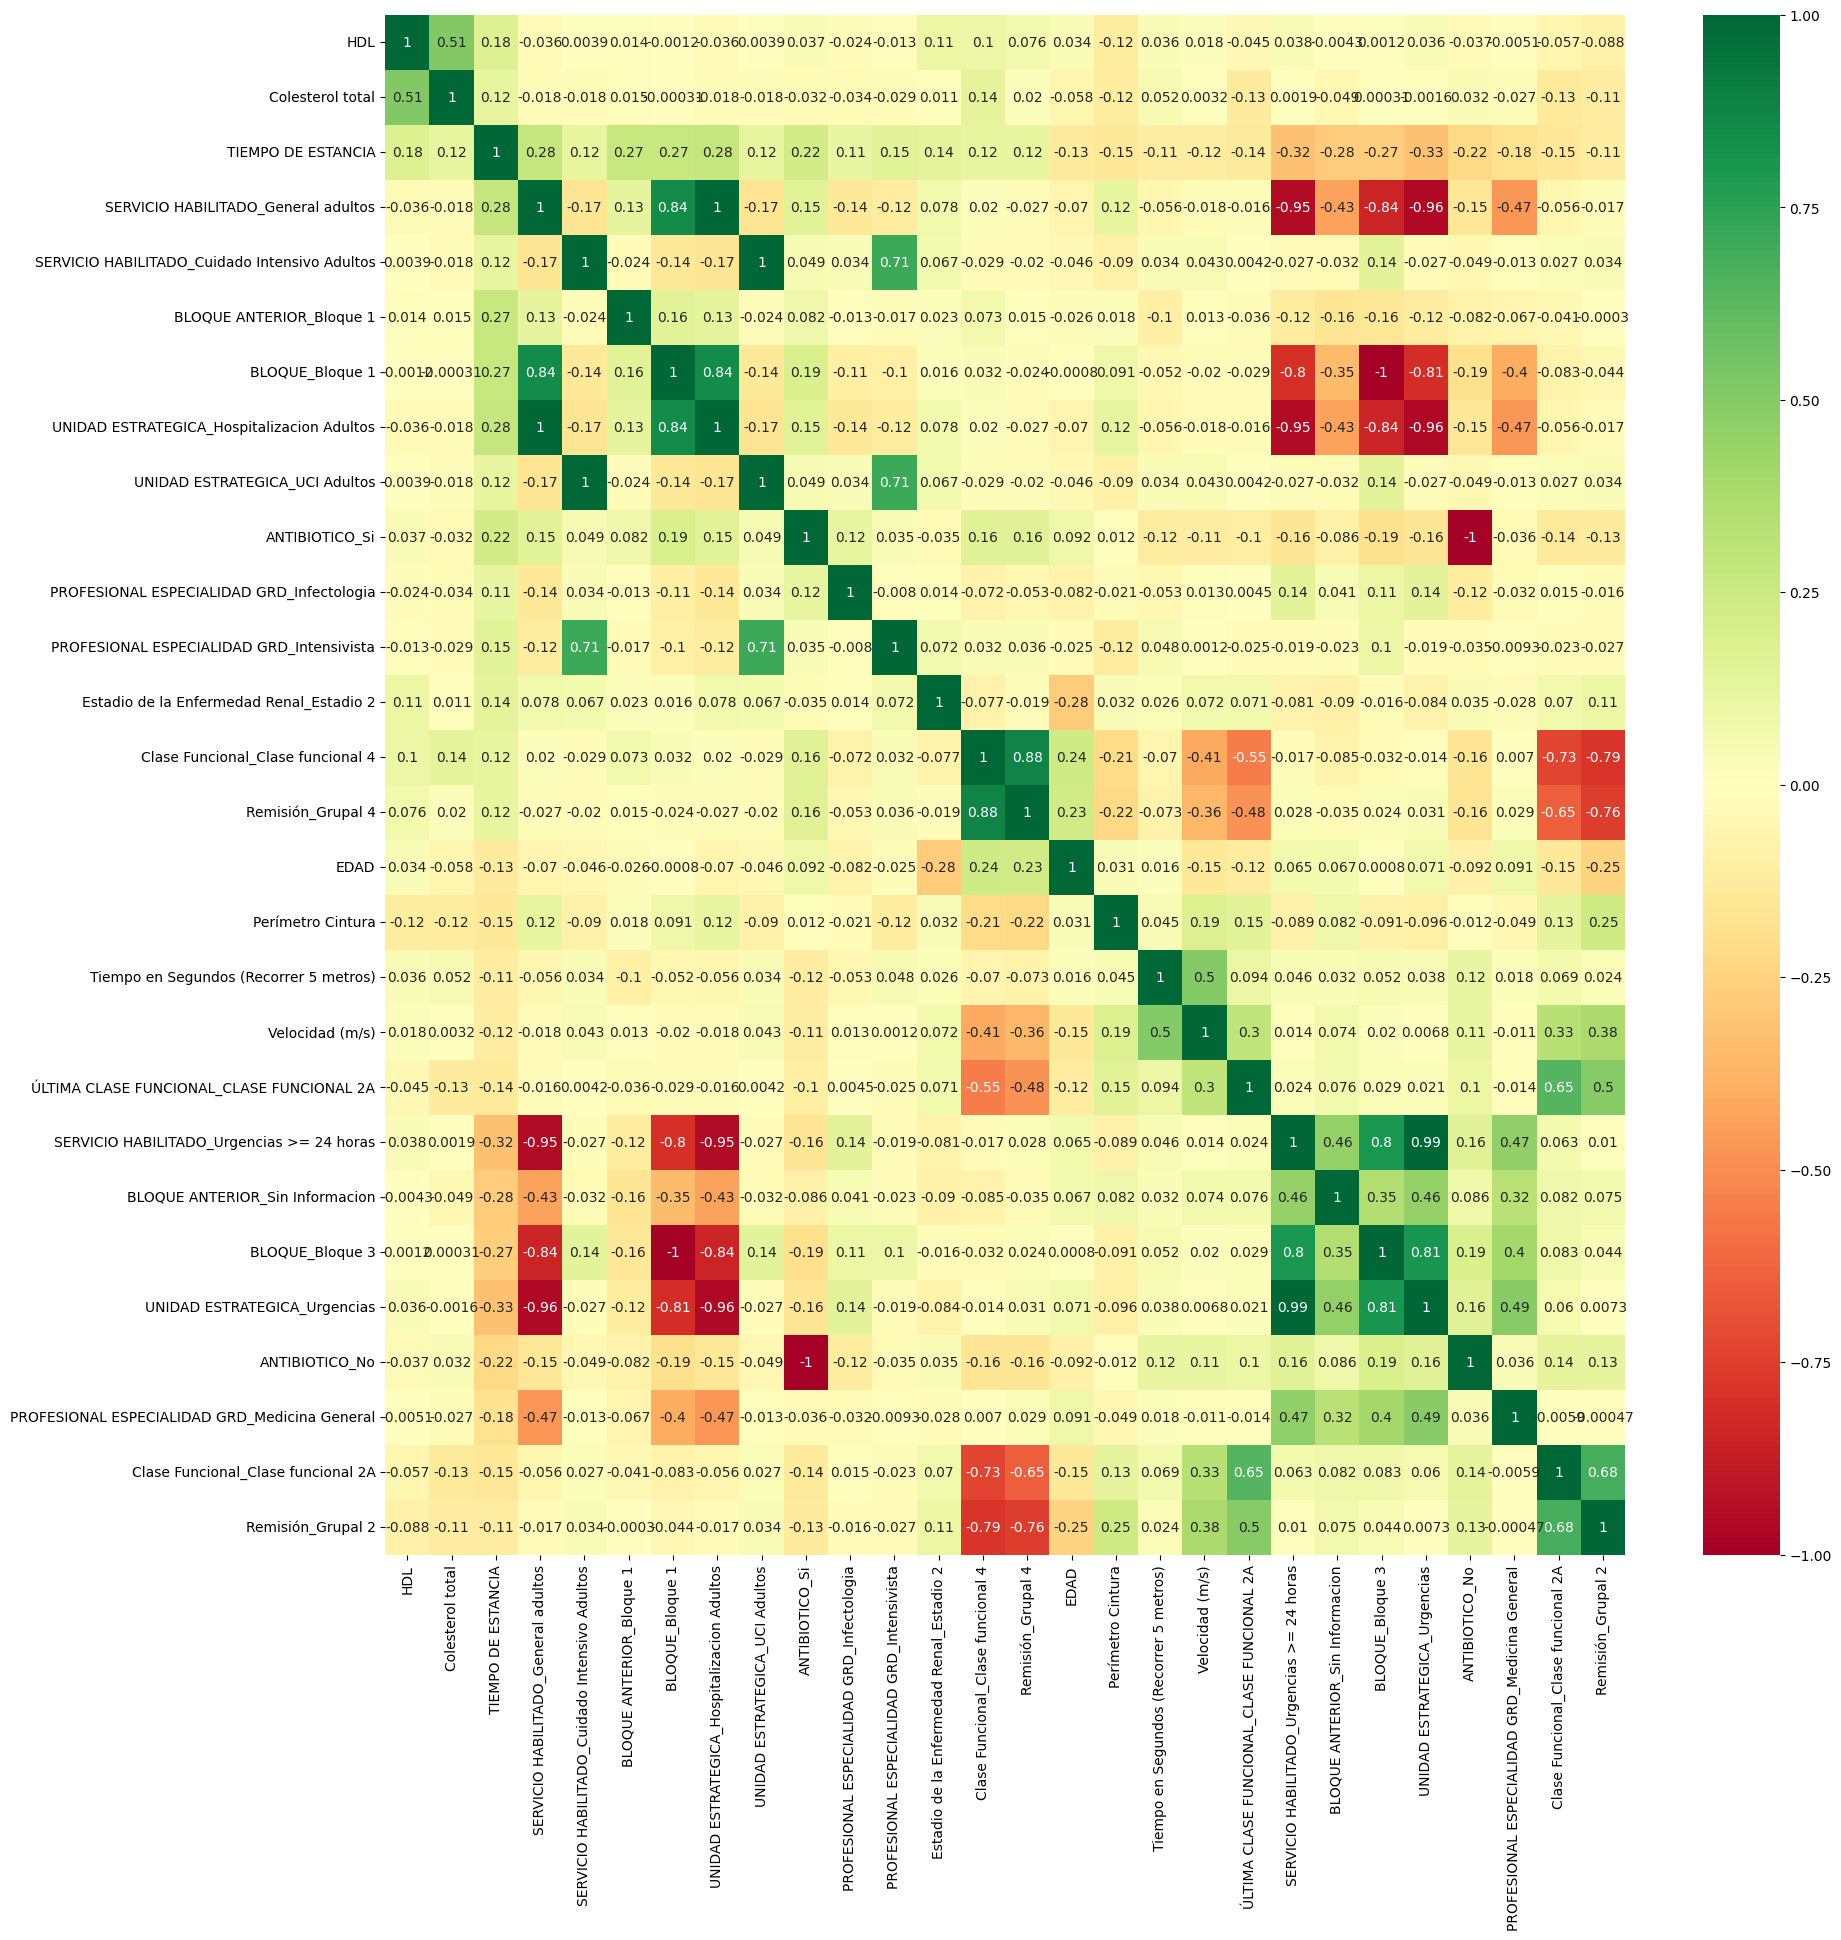

In [507]:
# hacer un Mapa de calor correlaciones entre las variables de la base de datos df3_num con la variable objetivo TIEMPO DE ESTANCIA
plt.figure(figsize=(20,20))
sns.heatmap(df3_num.corr(),annot=True,cmap='RdYlGn')
plt.show()


## Analisis exploratorio

In [508]:
# analisis exploratorio de la columna TIEMPO DE ESTANCIA de la base de datos df4
df4["TIEMPO DE ESTANCIA"].describe() # se observa que el tiempo de estancia maximo es de 47 dias y el minimo de menos de 1 dia

count                        78900
mean     7 days 13:26:02.311081723
std      5 days 22:35:55.850263521
min         0 days 15:39:15.847000
25%         4 days 02:18:04.510000
50%         5 days 20:21:48.623000
75%         9 days 06:02:52.217000
max        47 days 19:56:11.493000
Name: TIEMPO DE ESTANCIA, dtype: object